In [19]:
import pyxdf
import numpy as np
import mne
mne.viz.set_browser_backend('matplotlib')  # or 'matplotlib' 'qt', etc.
from utils import read_data, EEGSignalQuality
import os
import glob
import matplotlib.pyplot as plt
matplotlib.style.use('default')
%matplotlib qt

In [ ]:
exp_path = os.path.join("exp_data", "02_Experimental")
control_path = os.path.join("exp_data", "01_Control")
glob_pattern = os.path.join("**", "*.xdf")

In [ ]:
exp_files = [f for f in glob.glob(os.path.join(exp_path, glob_pattern), recursive=True)
             if '-old' not in f.split(os.sep)]

exp_dict = {}
for f in exp_files:
    parts = f.split(os.sep)
    exp_folder = next((p for p in parts if p.startswith('EXP') and len(p) == 5), None)
    if exp_folder:
        exp_dict[exp_folder] = f
        
exp_dict

In [ ]:
subject = exp_dict['EXP02']
raw, events, mapping = read_data(subject)
raw

In [ ]:
mapping['ast']

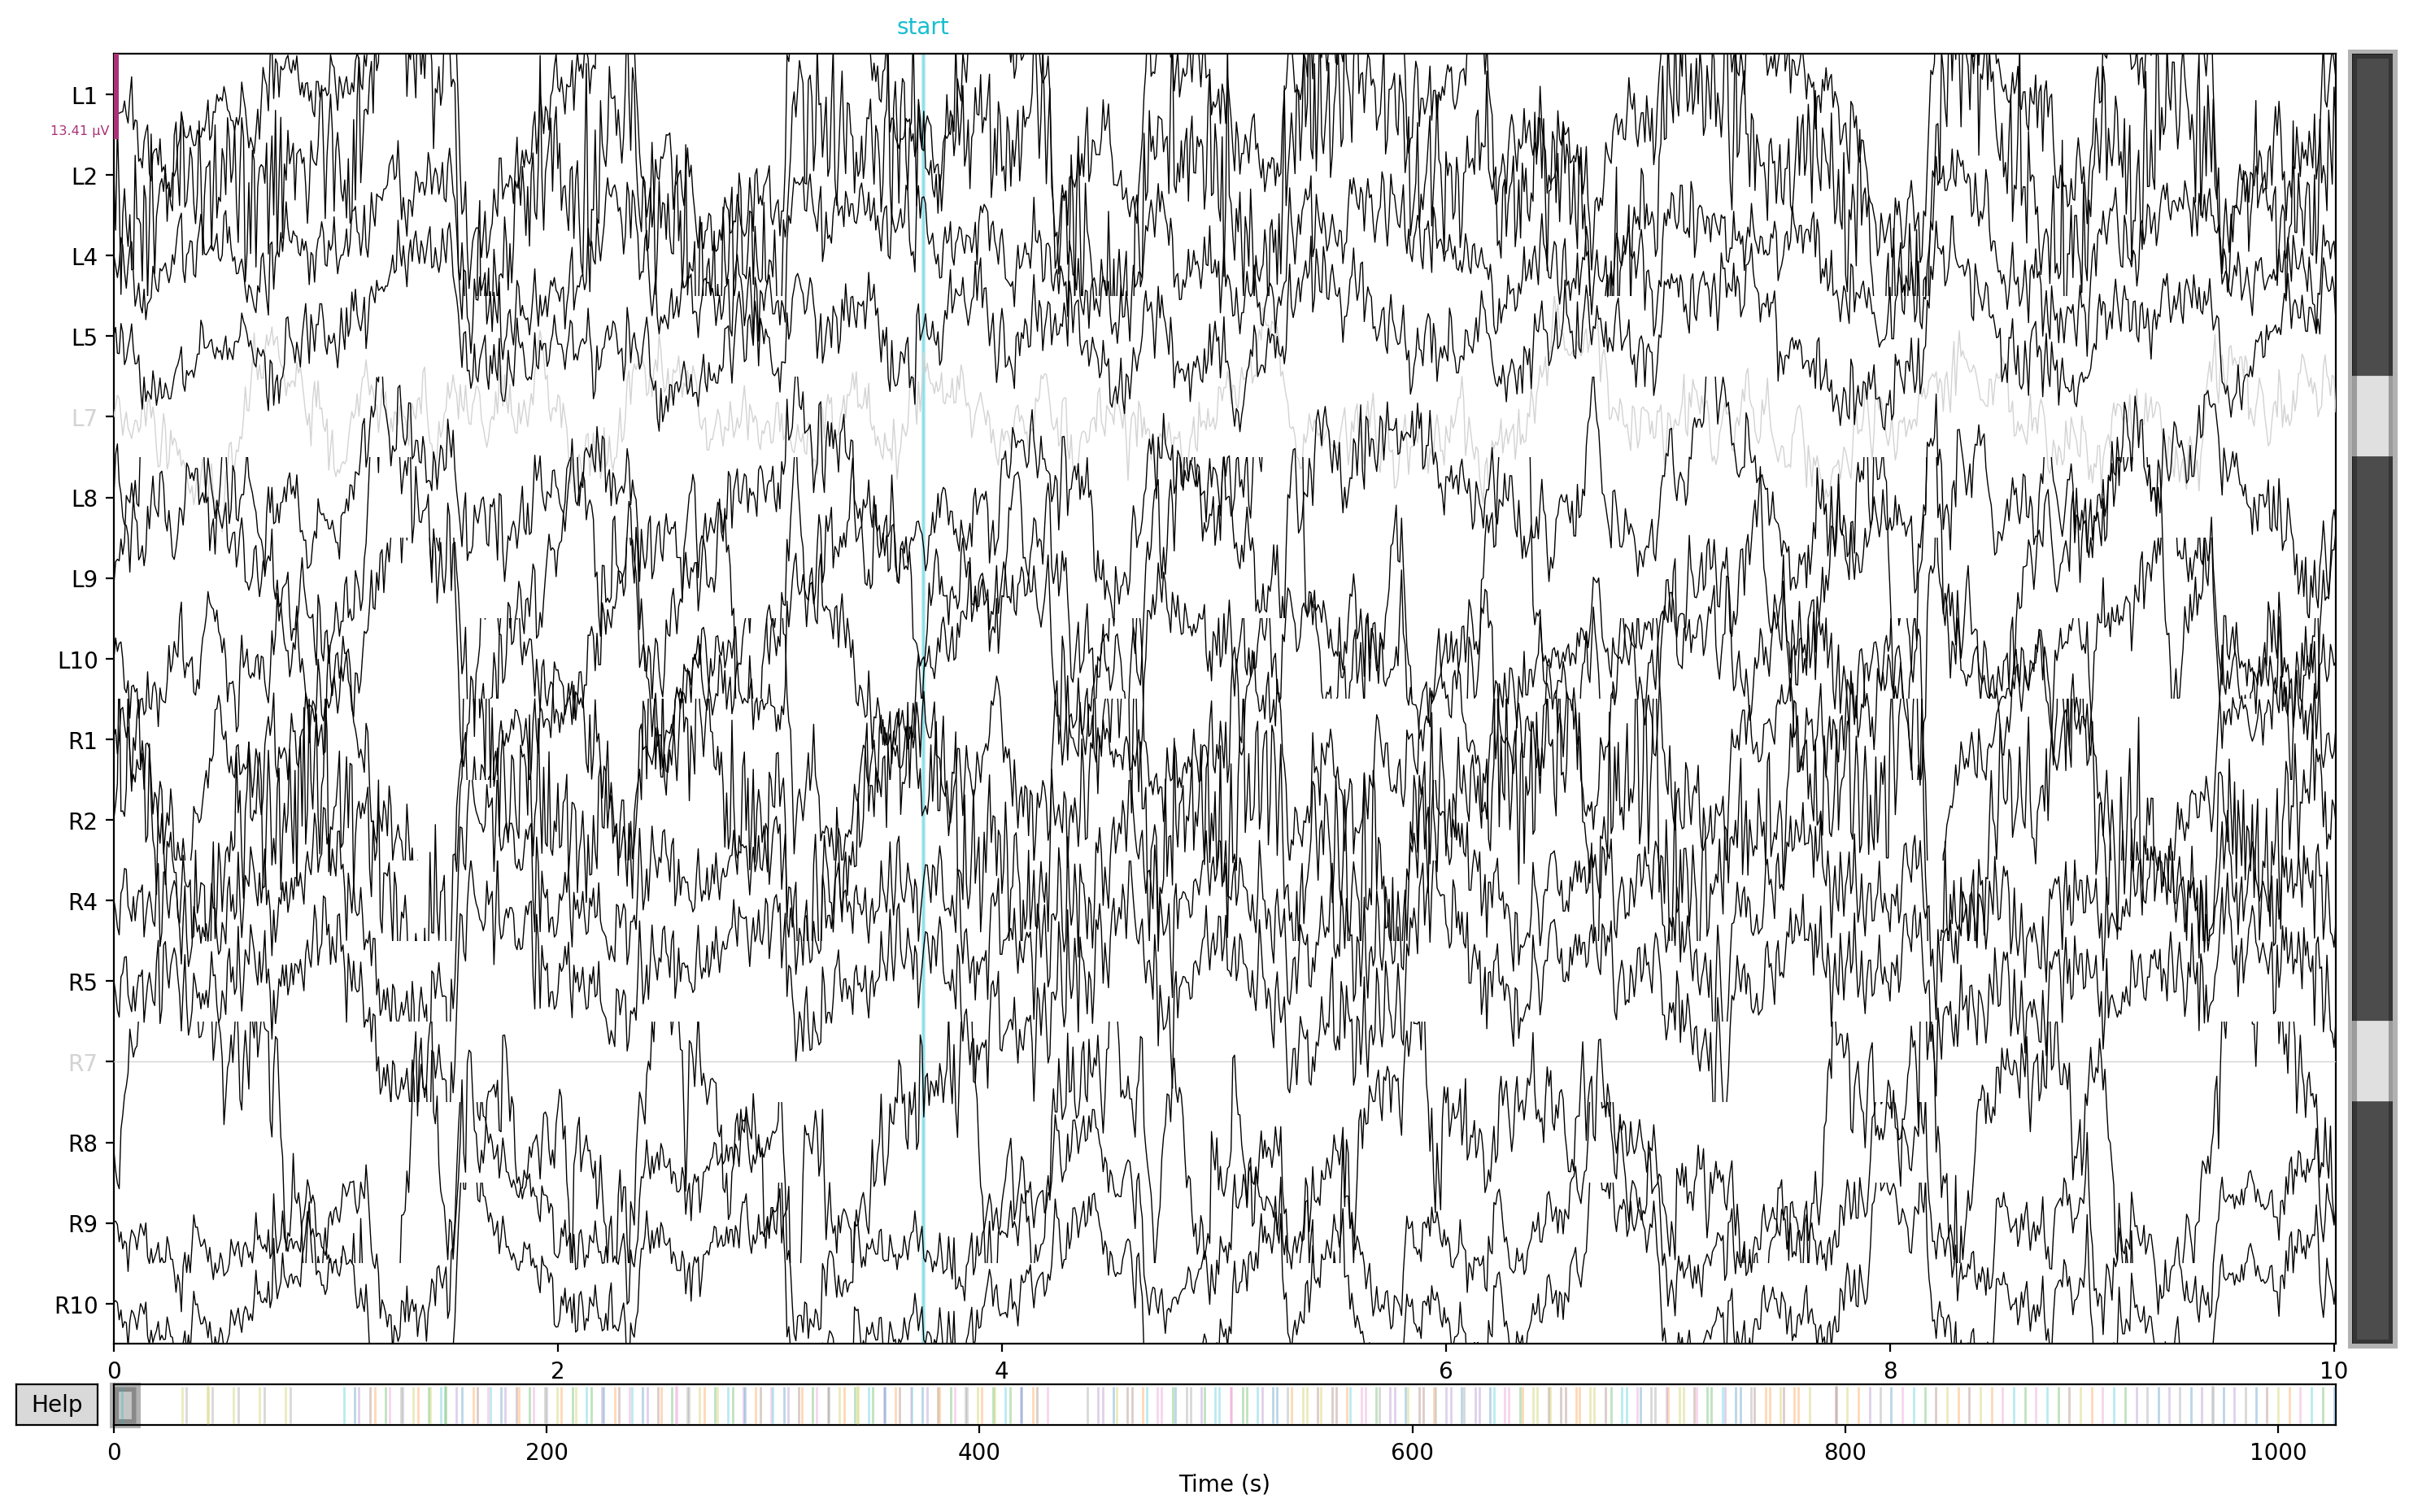

In [16]:
raw.plot(scalings='auto')

In [20]:
ch_labels = ['L1', 'L2', 'L4', 'L5', 'L7', 'L8', 'L9', 'L10',
                 'R1', 'R2', 'R4', 'R5', 'R7', 'R8', 'R9', 'R10']
quality_analyzer = EEGSignalQuality(raw, ch_labels, None)
results = quality_analyzer.comprehensive_quality_assessment(None)

Running comprehensive EEG signal quality assessment...
1. Calculating RMS...
2. Calculating SNR...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 825 samples (6.600 s)

Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
S

In [21]:
# Print summary
for summary in results["quality_summary"]:
    print(
        f"Channel {summary['channel']}: {summary['quality_grade']} (Score: {summary['overall_score']:.3f})"
    )

Channel L1: B - Good (Score: 0.666)
Channel L2: B - Good (Score: 0.672)
Channel L4: B - Good (Score: 0.711)
Channel L5: B - Good (Score: 0.727)
Channel L7: B - Good (Score: 0.666)
Channel L8: B - Good (Score: 0.695)
Channel L9: B - Good (Score: 0.666)
Channel L10: B - Good (Score: 0.677)
Channel R1: B - Good (Score: 0.672)
Channel R2: B - Good (Score: 0.667)
Channel R4: B - Good (Score: 0.748)
Channel R5: B - Good (Score: 0.754)
Channel R7: A - Excellent (Score: 0.810)
Channel R8: B - Good (Score: 0.680)
Channel R9: B - Good (Score: 0.670)
Channel R10: B - Good (Score: 0.672)
